In [3]:
from simulation import Simulation
from lineages import Lineage
import matplotlib.pyplot as plt
import scipy
import numpy as np
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import matplotlib
font = {'size'   : 18} # 'weight' : 'bold'

matplotlib.rc('font', **font)

In [6]:
sim1 = Simulation(dt=1/120, Delta=12, D_sd=3, tau=20, t_sd=3) # 2fps, averge doubling time 20 mins, adder at 10

In [7]:
OD = sim1.run(length=800, vm=20, n=2) # initialise a long mother cell

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96000/96000 [00:03<00:00, 24448.98it/s]


In [8]:
# sim2 = Simulation(dt=1/120, Delta=10, D_sd=2, tau=20, t_sd=3) # 2 fps
# sim2.run(length=200, vm=5) # initialise a short mother cell

In [9]:
# line = Lineage([sim1, sim2], cell=-1)
line = Lineage([sim1], cell=-1)

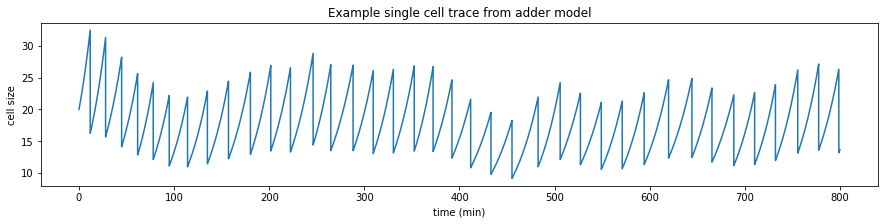

In [10]:
plt.figure(figsize=(15,3))
plt.title("Example single cell trace from adder model")
plt.xlabel("time (min)")
plt.ylabel("cell size")
plt.plot(line.times[0], line.lineages[0])
plt.show()

In [66]:
S = 5 # sampling per generation
samples, times = line.downsample(n=int(120 * 20 / S), plot=False)

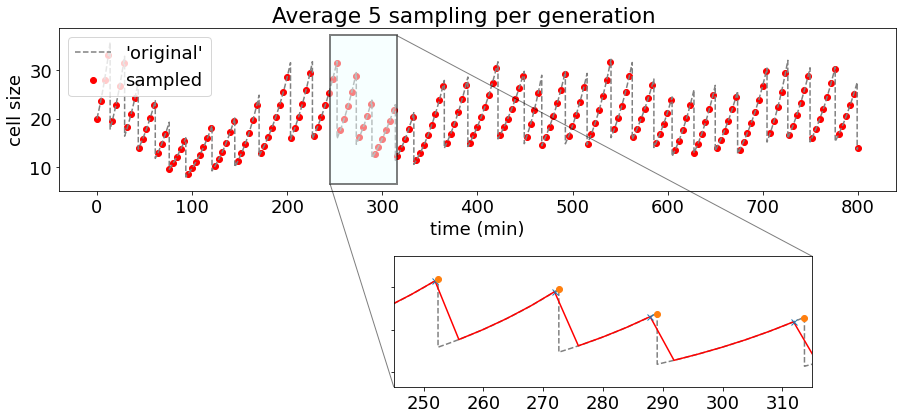

In [67]:
fig, ax = plt.subplots(figsize=[15, 3])

fig.suptitle("Average {} sampling per generation".format(S))
ax.set_xlabel("time (min)")
ax.set_ylabel("cell size")
ax.plot(line.times[0], line.lineages[0], color='0.5', linestyle='dashed', label="'original'")
# ax.plot(times[0], samples[0], label="sampled", color='red')
ax.scatter(times[0], samples[0], label="sampled", color='red')

# ax.set_ylim(6, 50)

# # inset axes....
axins = ax.inset_axes([0.4, -1.2, 0.5, 0.8])
axins.plot(line.times[0], line.lineages[0], color='0.5', linestyle='dashed', label="'original'")
axins.plot(times[0], samples[0], label="sampled", color='red')
idx, _ = scipy.signal.find_peaks(samples[0])
axins.plot(times[0][idx], samples[0][idx], "x")
axins.plot(line.divisions_t[0], line.lineages[0][np.array(line.divisions_idx[0])], "o")

axins.set_xlim(245, 315)
# axin.set_ylim(0.75, 1.4)

# axins.set_xticklabels([])
axins.set_yticklabels([])

ax.indicate_inset_zoom(axins, edgecolor="0", linewidth=2, facecolor='azure')


plt.legend(loc='upper left')
plt.show()

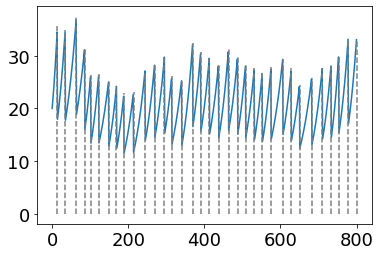

In [31]:
samples, times = line.downsample(n=120) # 1 mins

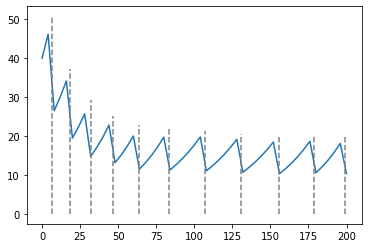

In [15]:
samples, times = line.downsample(n=480) # 4 mins

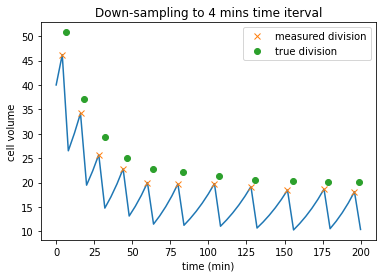

In [16]:
plt.title("Down-sampling to 4 mins time iterval")
plt.xlabel("time (min)")
plt.ylabel("cell volume")
idx0 = line.find_division(samples, times, i=0)

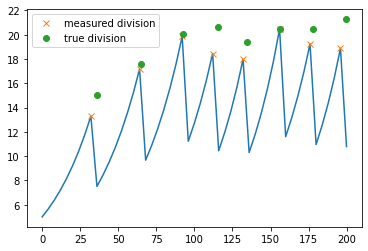

In [27]:
idx1 = line.find_division(samples, times, i=1)

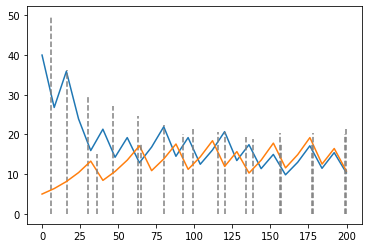

In [32]:
samples_w, times_w = line.downsample(n=960) # 8 mins

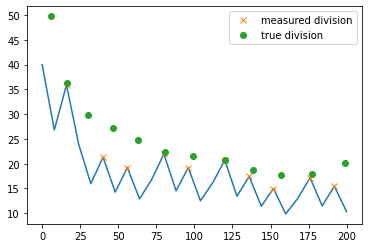

In [31]:
idx_w = line.find_division(samples_w, times_w, i=0)